In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm

__Importing loans data__

In [2]:
loan = pd.read_csv("./loan.csv", low_memory=False)

In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning:

In [5]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

__The variable Term, represent number of payments on the loan. Values are in months and can be either 36 or 60, so taking out just the integer value__

In [6]:
loan.term = loan.term.apply(lambda x: int(x.split(' ')[1]))

In [7]:
loan.shape

(39717, 111)

In [8]:
round((100*loan.isnull().sum() / len(loan)).sort_values(ascending = False), 2)

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
                              ...  
pub_rec                         0.0
open_acc                        0.0
inq_last_6mths                  0.0
earliest_cr_line                0.0
id                              0.0
Length: 111, dtype: float64

#### Remove the columns that have no data at all

In [9]:
loan.dropna(how='all',axis = 1 , inplace = True)

In [10]:
loan.shape

(39717, 57)

#### Percentage of missing values

In [11]:
round((100*loan.isnull().sum() / len(loan)).sort_values(ascending = False), 2)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

#### Removing columns where more than 50% data is missing.
#### Removing desc and title column because similar data is captured in purpose, which is more relevant to our analysis.

In [12]:
dropColList = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'title']
loan = loan.drop(dropColList, axis=1)

In [13]:
round((100*loan.isnull().sum() / len(loan)).sort_values(ascending = False), 2)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
zip_code                      0.00
sub_grade                     0.00
home_ownership                0.00
dti                           0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
addr_state          

__Since the missing value percentage across all columns now is either zero or very low, we choose to ignore the missing values i.e. not impute them or drop them, because they wouldn't impact our analysis in any way.__

In [14]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Because our aim is to identify patterns which indicate if a person is likely to default or not, Deleting rows with loan_status 'Current'

In [15]:
loan = loan[loan.loan_status != 'Current']
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Dropping columns that have just one unique entry throughout

In [16]:
loan = loan.loc[:,loan.nunique() != 1]

In [17]:
loan.shape

(38577, 41)

In [18]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [19]:
loan['url'].head()

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
5    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

__Taking a closer look at url we can see that url is just a combination of one static string and loan_id, the code (cell) below gives zero rows__
<br>__So we can drop either id or url, we decided to drop the url column__

In [20]:
loan[loan.url != loan.id.apply(lambda x: 'https://lendingclub.com/browse/loanDetail.action?loan_id='+str(x))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [21]:
loan.drop('url', axis=1, inplace = True)

In [22]:
print(loan.int_rate.head())
print(loan.revol_util.head())

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object
0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object


__Removing the percent sign at the end of int_rate, revol_util and convert dtype into float__

In [23]:
loan.int_rate = loan.int_rate.str[:-1].astype(float)
loan.revol_util = loan.revol_util.str[:-1].astype(float)

In [24]:
len(loan.id.unique())

38577

In [25]:
loan.shape

(38577, 40)

In [26]:
len(loan.member_id.unique())

38577

__Dropping member_id because both id and member_id are unique and we don't need them both.__
<br>
__Dropping earliest_cr_line ("The month the borrower's earliest reported credit line was opened") because it doesn't seem relevant to our analysis__
<br>
__Dropping customer behaviour variables, because they don't contribute to loan_status decision making, which needs to be before giving the loan__
<br>
__Dropping emp_title because it's not relevant to our analysis__

In [27]:
loan.drop(['member_id','earliest_cr_line'], axis=1, inplace = True)

#'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d', 'recoveries', 'total_pymnt'
custBehaviourList = ['collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', 'total_pymnt', 'zip_code', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee']
loan.drop(custBehaviourList, axis=1, inplace = True)
loan.drop('emp_title', axis=1, inplace = True)

In [28]:
len(loan.columns)

27

In [29]:
#to convert loan_status into boolean variable.
loan['loan_status'] = loan['loan_status'].apply(lambda x: True if x == 'Fully Paid' else False)

In [30]:
loan.loan_status.head()

0     True
1    False
2     True
3     True
5     True
Name: loan_status, dtype: bool

__Converting issue date from string to pandas date-time format__

In [31]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

__Looking for unique values for each columns to determine which variables are categorical__

In [32]:
for col in loan:
    print(col +": \t\t" +str(len(loan[col].unique())))

id: 		38577
loan_amnt: 		870
funded_amnt: 		1019
funded_amnt_inv: 		8050
term: 		2
int_rate: 		370
installment: 		15022
grade: 		7
sub_grade: 		35
emp_length: 		12
home_ownership: 		5
annual_inc: 		5215
verification_status: 		3
issue_d: 		55
loan_status: 		2
purpose: 		14
addr_state: 		50
dti: 		2853
delinq_2yrs: 		11
inq_last_6mths: 		9
open_acc: 		40
pub_rec: 		5
revol_bal: 		21275
revol_util: 		1089
total_acc: 		82
total_rec_int: 		34025
pub_rec_bankruptcies: 		4


### Exploring relationship between categorical variables and loan status.
We will define a function that takes a categorical variable name and generates plots depicting univariate analysis as well as analysis with respect to the targeted variable (loan_status).


In [33]:
def categorical_plots(name):
    fig, ax = plt.subplots(1,3,figsize=(16, 7))
    chart = sns.countplot(x=name, data=loan,color='cyan',alpha=0.8,ax=ax[0])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90 ,horizontalalignment='right');
    ax[0].set_title('Among all loans')
    l = loan[loan.loan_status == False]
    ct = pd.crosstab(l[name], l['loan_status'], normalize='columns')
    ct.plot.bar(ax=ax[1], stacked=False, legend = False, color='magenta',alpha=0.3 , title = 'Among all Defaults')
    ct = pd.crosstab(loan[name], loan['loan_status'], normalize='index')
    ct.plot.bar(ax=ax[2], stacked=True, title = 'Among all loans')

['term', 'sub_grade', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
Please enter one of the categorical variable names: 
purpose


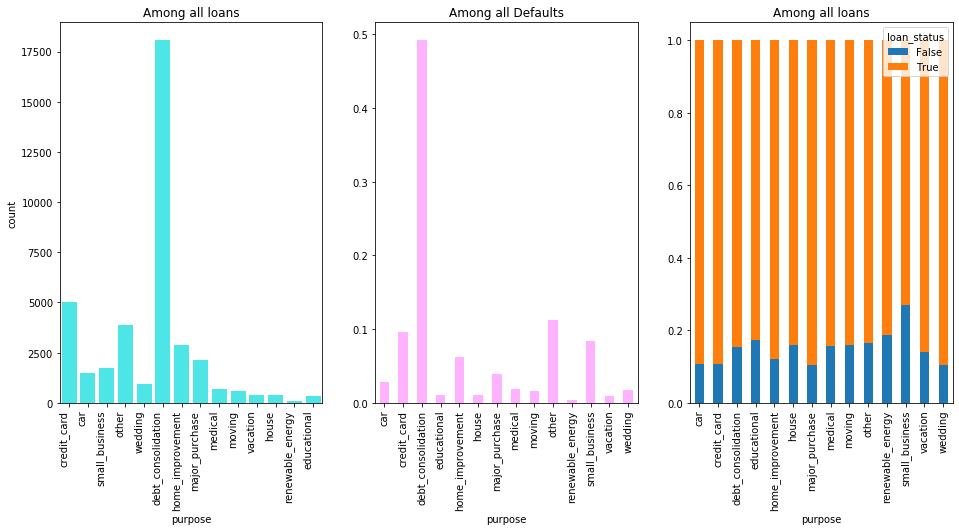

In [34]:
categoricalCol = ['term','sub_grade', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
print(categoricalCol)
print('Please enter one of the categorical variable names: ')
col = input()
categorical_plots(col)

### Observations from Univariate, Segmented Univariate and Bivariate analysis of categorical predictors of loan status
  1. __Term__ :
    - Observing the number of loans, We found that majority of loans are given for a term of 36 months.
    - Observing defaulted loans, 36 month loan constitute 56% of the total defaulted loans.
    - However, looking at loan_status , we find that higher proportion of 60 month loan are charged off compared to 36 month.
    - It seems 60 month loans are more risky and therefore are rightfully issued sparingly.
  2. __Grade__ :
    - B is the most issued grade for loans, and also constitutes highest proportion of total defaults. People who are issued grade A loans are least likely to default, whereas people with grade G loan are most likely to default.
  3. __Emp length__:
    - Most of the loans are issued either to people with more than 10 years of experience or early in their job (upto 3 years of experience). We didn't find emp_length to be a driving variable for defaulting.
  4. __Home_ownership__:
    -  We find that it is not a driving variable for defaulting. Proportion of defaults are directly proportional to the loans issued in that segment.
  5. __Verfication_status__:
    -  We find that it is not a driving variable for defaulting. Proportion of defaults are directly proportional to the loans issued in that segment.
  6. __Purpose__:
    - Even though about 50% of default under debt consolidation, it is as a result of majority of loans being sanctioned for the purpose of debt consolidation. On the other hand, only a small portion of loans are sanctioned for small businesses, more than 20% of these are charged off as oppose to about 15% with debt consolidation. Therefore, loans for small businesses should be approved with caution.
  7. __Pub_rec_bankruptcies__: 
    - Individuals without any record of bankruptcies are safest to issue loans.





### Exploring relationship between continuous variables and loan status.
We will define a function that takes a continuous variable name and generates plots depicting univariate analysis as well as analysis with respect to the targeted variable (loan_status).

In [35]:
def continuous_plots(name):
    f, axes = plt.subplots(1, 3, figsize=(16, 7))
    sns.boxplot(y=name,  data=loan, ax=axes[0],color='green')  
    
    Q1 = loan[name].quantile(0.25)
    Q3 = loan[name].quantile(0.75)
    IQR = Q3 - Q1
    loan_OT = loan[(loan[name] >= (Q1 - 1.5 * IQR))&(loan[name] <= (Q3 + 1.5 * IQR))]
    sns.distplot(loan_OT[name], kde=True, color="r", ax=axes[1]);
    #sns.distplot(loan[name], kde=True, color="b", ax=axes[1]);
    
    sns.boxplot(y=name, x="loan_status", data=loan_OT, ax=axes[2])

['funded_amnt_inv', 'revol_bal', 'dti', 'revol_util', 'installment', 'int_rate', 'annual_inc', 'total_acc', 'total_rec_int', 'loan_amnt', 'open_acc']
Please enter one of the continuous variable names: 
open_acc


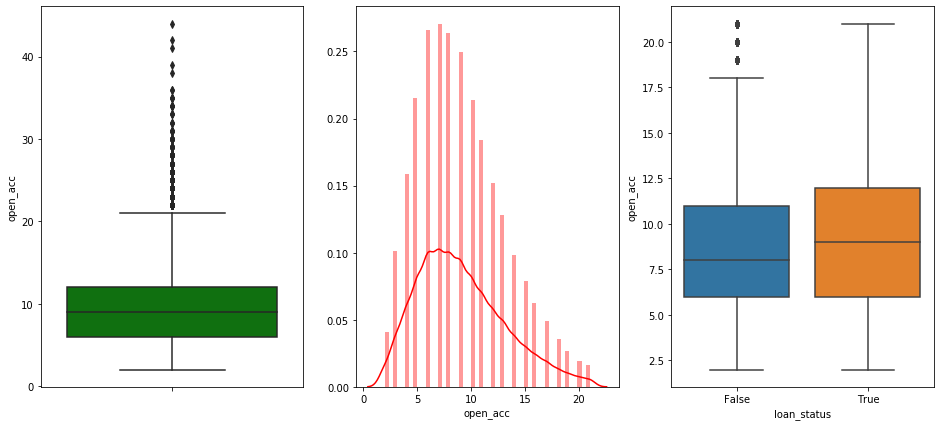

In [38]:
continuousVariables = ['funded_amnt_inv','revol_bal', 'dti', 'revol_util', 'installment', 'int_rate', 'annual_inc', 'total_acc', 'total_rec_int', 'loan_amnt', 'open_acc']
print(continuousVariables)
print('Please enter one of the continuous variable names: ')
col = input()
continuous_plots(col)

### Observations from Univariate, Segmented Univariate and Bivariate analysis of continuous predictors of loan status

  1. __Funded amount invested__:
        - The total amount committed by investors for that loan at that point in time varies widely between 5000 dollars to more than 35,000 dollars. However,Boxplot sugggests many outliers (investment amounts of more than 30,000 dollars were usually outliers), so corrected for them but it is not a driving variable for defaults.
 
  2. __revol_bal__:
        - Revolving balance is highly skewed and has many outliers. 
        - Correcting for outliers, revolving balance is still skewed towards left (zero). 
        - However, there was no difference in amount of revolving balance when compared with respect to whether someone defaults or not.
  3. __dti (Debt to Income Ratio)__: Interestingly higher debt to income ratio does not appear to be a significant risk factor for defaulting. On an average, those who default only had a slightly higher median dti than those who don't.
    
  4. __revol_util__:
        - We find similar observation as revolving balance here.
        - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit was moderately higher for individuals who default.
        
  5. __Installment__:
        - Although installment amount has various outliers, the average installment amount based on whether someone defaults or not is not significant.
           
  6. __Interest rate__:
        - Median of Interest rates is higher for defaulters than fully paid loans
        - So it appears that people who are likely to default are getting loans at higher interest rates.
        
  7. __Annual Income__:
        - Annual income has a lot of outliers towards the higher end. 
        - After correcting for outliers, we find that people who earn more are slightly less likely to default.
  8. __Total account__:
        - The total number of credit lines currently in the borrower's credit file has a lot of outliers, but, no siginificant difference in terms of defaults.
  9. __Total_rec_int__:
        - Interest received to date. Data has a lot of outliers but no significant observation w.r.t. defaults.
  10. __Loan amount__:
        - After correcting for outliers, we find that median loan amount of defaulters is slightly higher. So,high loan amounts should be approved with caution.
        
  11. __Open account__:
        - A lot of outliers towards higher end.
        - Higher the number of open credit lines in the borrower's credit file more likely the borrower is to fully pay their loan.
        - This makes sense as more number of open credit lines reflect borrower's good credit history.

#### Data Driven metrics:
__It would be interesting to see how loan amount to income ratio affects defaults:__
  - Creating a new variable LoanAmnt_AnnualInc_ratio by dividing loan_amnt by annual_inc

In [39]:
loan['LoanAmnt_AnnualInc_ratio'] = round(loan['loan_amnt']/loan['annual_inc'],2)

In [40]:
loan['LoanAmnt_AnnualInc_ratio'].describe()

count    38577.000000
mean         0.185836
std          0.115290
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: LoanAmnt_AnnualInc_ratio, dtype: float64

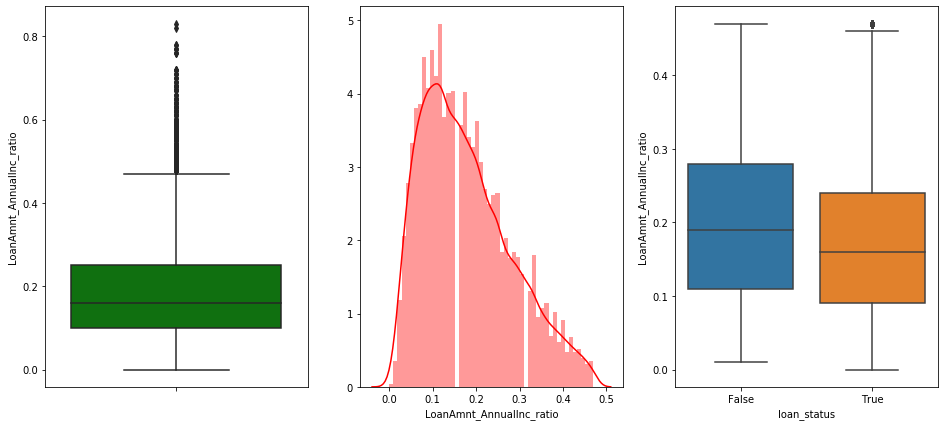

In [41]:
continuous_plots('LoanAmnt_AnnualInc_ratio')

__Loan amount to income ratio__:
- Borrowers with high loan ammount to income ratio are likely to default on their loans more.

In [42]:
loan['year'] = loan['issue_d'].dt.year
loan['month'] = loan['issue_d'].dt.month

In [43]:
loan['month'].unique

<bound method Series.unique of 0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 38577, dtype: int64>

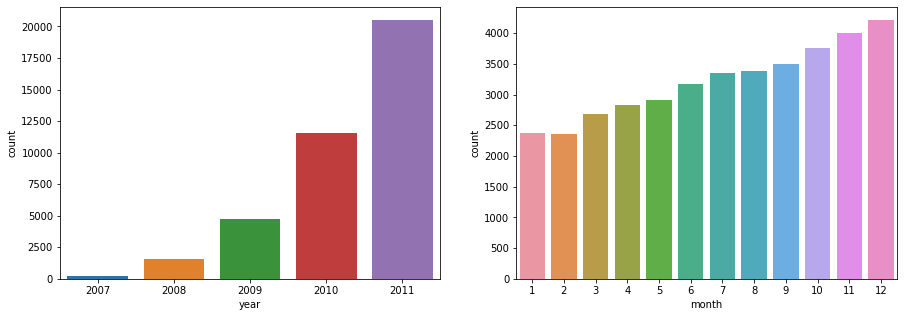

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(loan['year'], order=sorted(loan.year.unique()))
plt.subplot(1, 2, 2)
sns.countplot(loan['month'], order=sorted(loan.month.unique()))

In [45]:
(set(loan.columns)).difference(set(continuousVariables).union(set(categoricalCol)))

{'LoanAmnt_AnnualInc_ratio',
 'funded_amnt',
 'id',
 'issue_d',
 'loan_status',
 'month',
 'year'}